# 3. About 시각화

## 3.1 Line Plot

In [31]:
# matplotlib 사용

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_kospi = pd.read_csv('KOSPI.csv', index_col=0)
df_kospi

,Close
Date,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31
...,...
2021-12-13,3001.66
2021-12-14,2987.95
2021-12-15,2989.39


<Figure size 640x480 with 0 Axes>

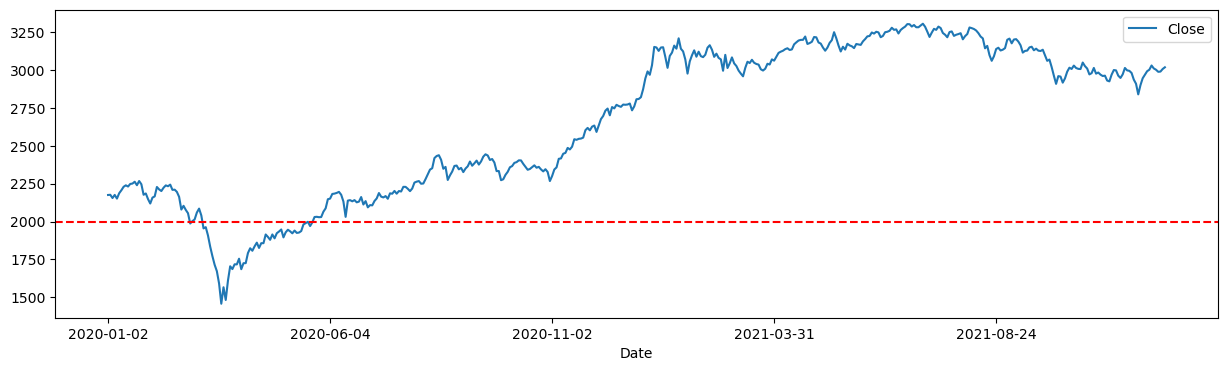

In [43]:
# 꺾은선 그래프 1
plt.figure() # 도화지를 생성

df_kospi.plot(figsize = (15, 4)) # 그래프 사이즈 지정
plt.axhline(2000, linestyle='--', color='red') # 빨간 점선을 2000에 그려주기

plt.show() # 그래프 그리기

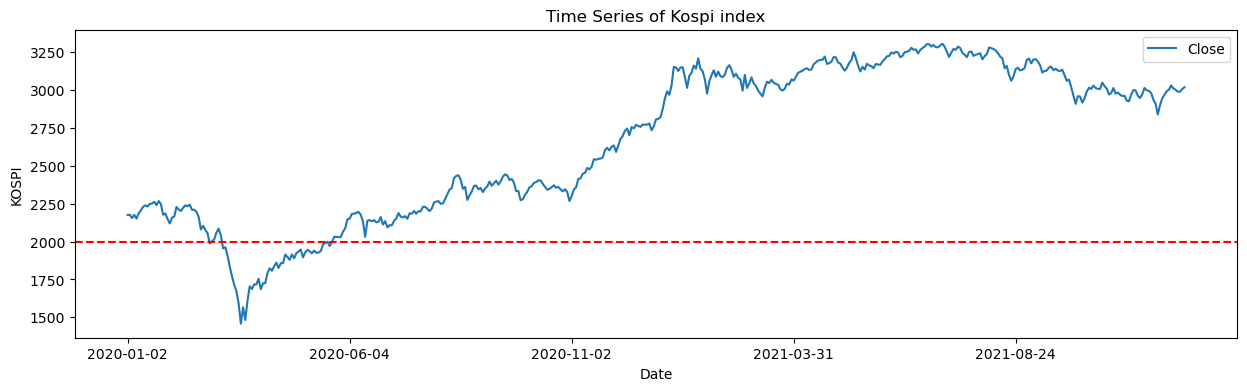

In [57]:
# 꺾은선 그래프 2(여러개의 그래프를 한 번에 그릴 때 유리함)
fig, ax = plt.subplots() # 도화지 생성, 도화지를 ax라고 함

df_kospi.plot(kind = 'line', ax = ax, figsize = (15, 4)) # df_kospi의 data를 그릴건데 line 그래프로 할거고, 도화지는 ax고, 크기는 15, 4

plt.axhline(2000, linestyle='--', color='red') # 빨간 점선을 2000에 그릴거임

ax.set(xlabel = 'Date', ylabel = 'KOSPI', title = 'Time Series of Kospi index') # x, y라벨이랑 제목을 적어주기

plt.show()

## 3.2 다중 그래프 그래기

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_samsung = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 0, index_col=0)
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Volume')]

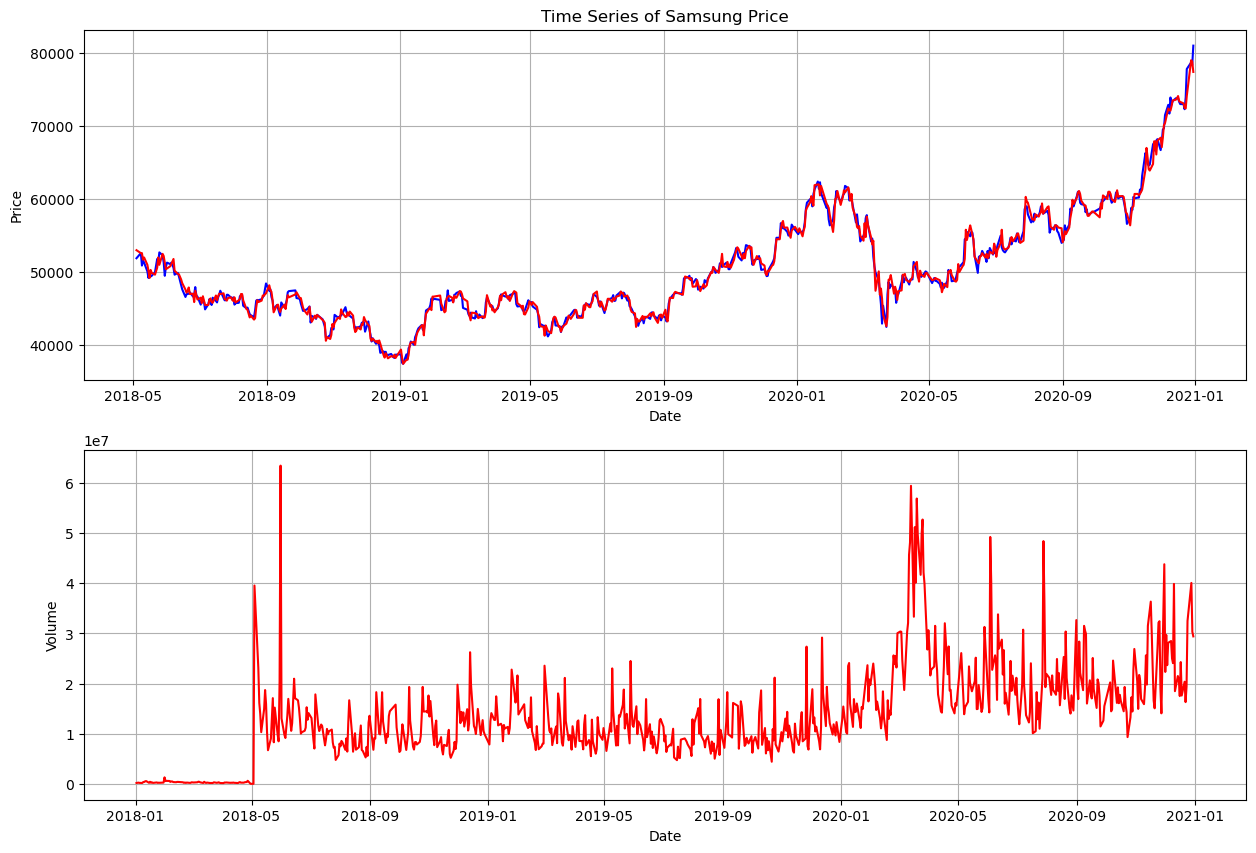

In [5]:
fig, axs = plt.subplots(2, 1, figsize = (15, 10)) # 2행 1열로 이루어진 그래프를 그릴거고 도화지 이름은 axs다.

axs[0].plot(df_samsung['Close']['2018-05-04':], color = 'blue') # df의 Close컬럼의 데이터를 이용
axs[0].grid(True) # 격자 넣기
axs[0].set(xlabel = 'Date', ylabel = 'Price', title = 'Time Series of Samsung Price')

axs[0].plot(df_samsung['Open']['2018-05-04':], color = 'red') # Open 데이터도 추가해 0번째 그래프에 그리기

axs[1].plot(df_samsung['Volume'], color = 'red')
axs[1].grid(True)
axs[1].set(xlabel = 'Date', ylabel = 'Volume')

## 3.3 Option

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 0, index_col=0)
df = df.loc['2018-01-02':]
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


In [121]:
# plt 공통 설정

plt.rcParams['figure.figsize'] = (20,14) # 그래프 각 축의 글자 크기 설정
plt.rc('font', family = 'AppleGothic') # 한글 폰트 설정
plt.rcParams['font.size'] = 15 # 폰트 사이즈 설정
plt.rc('axes', unicode_minus = False) # '-'도 폰트가 깨지는데, 이를 해결해주기

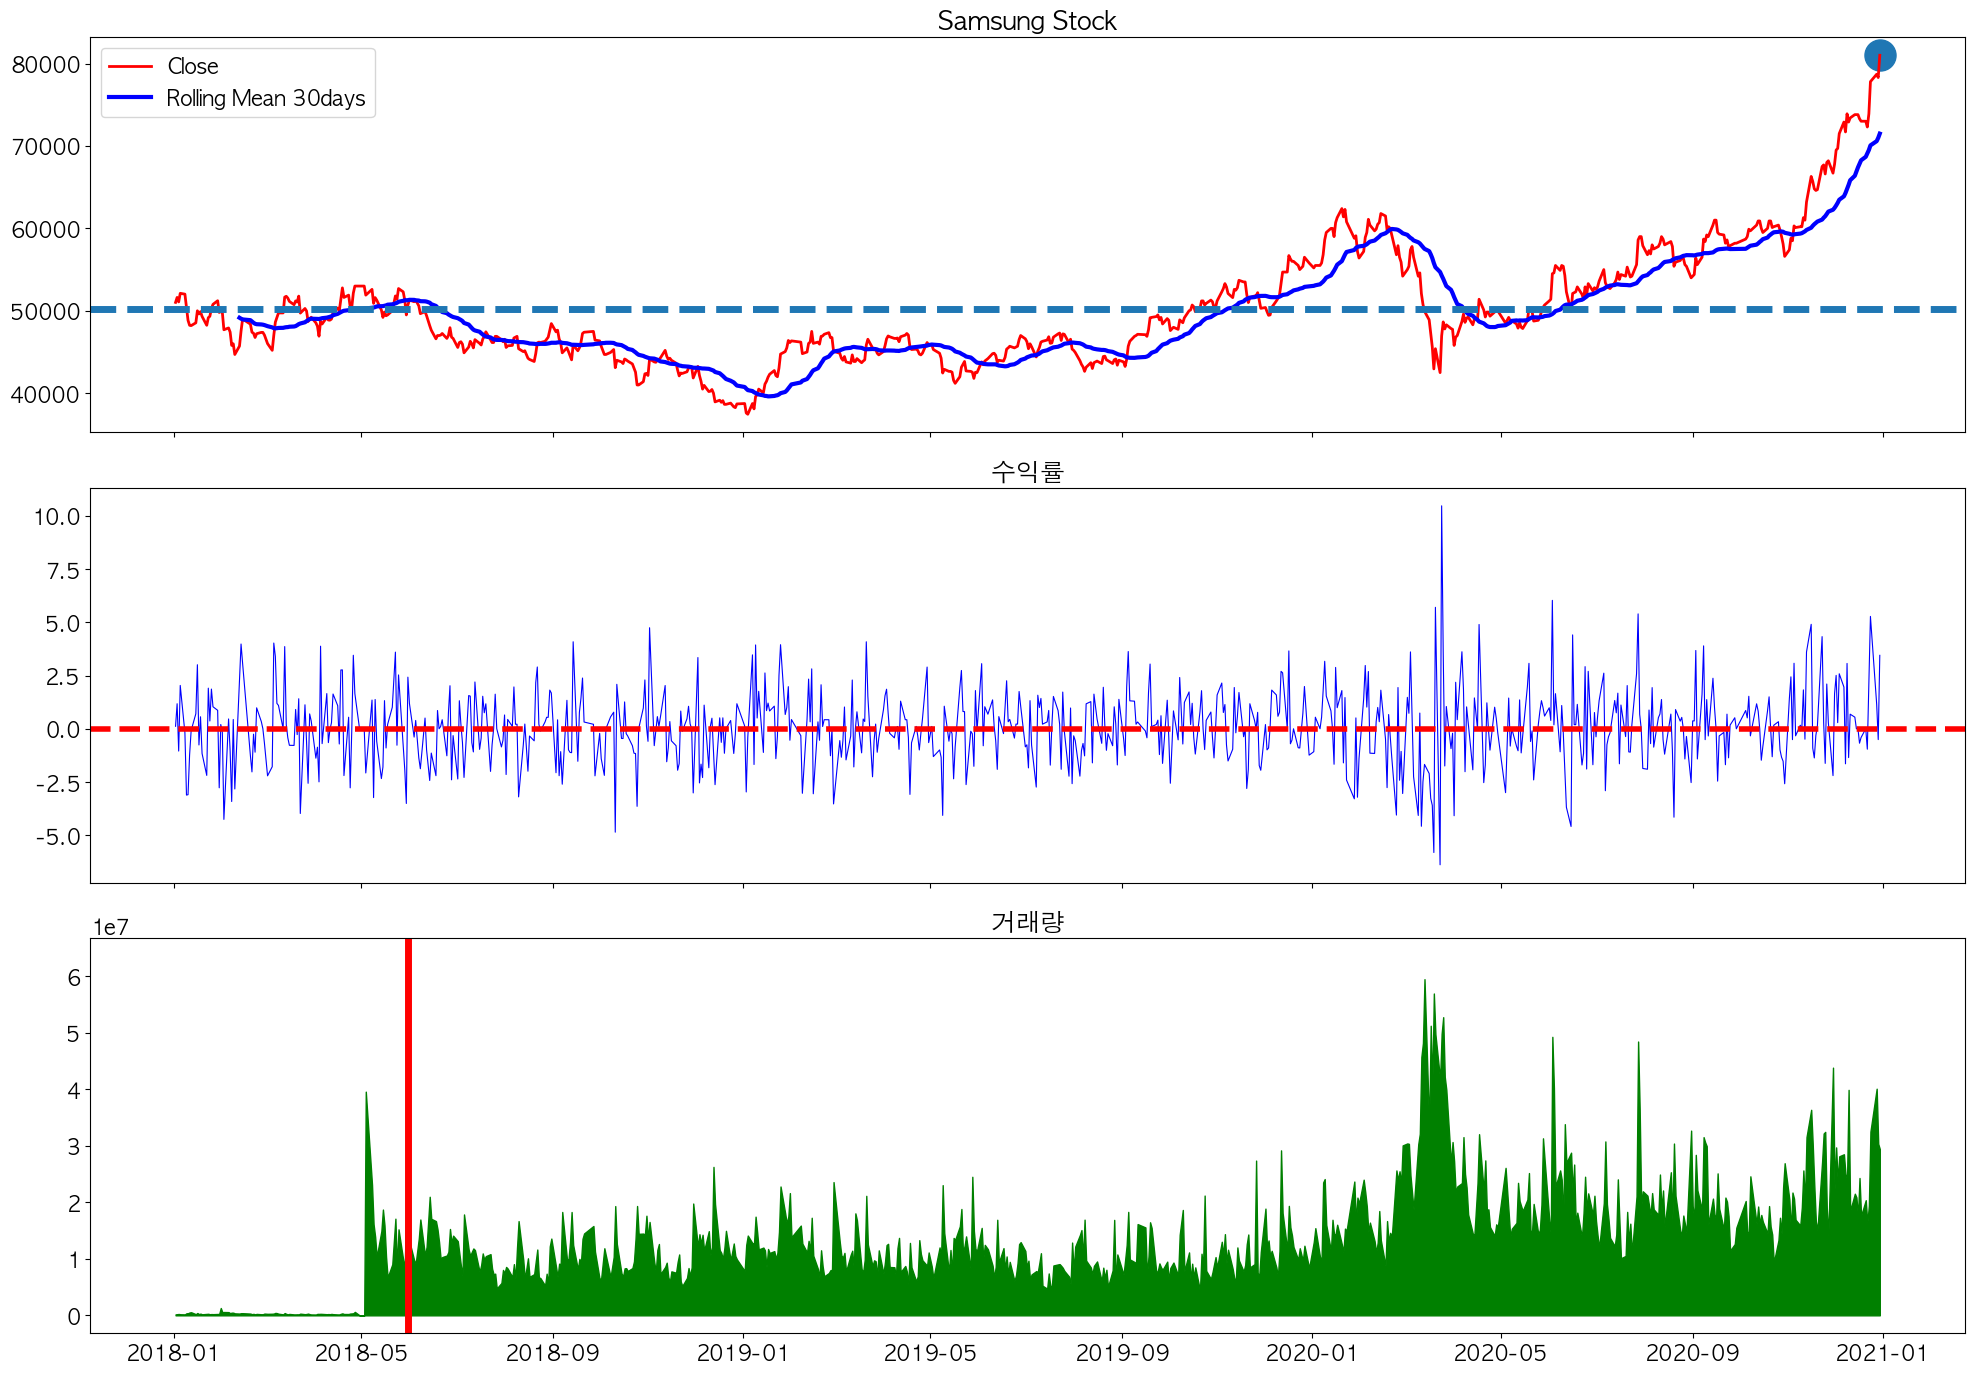

In [175]:
# (3,1) 그래프 그리기
fig, axes = plt.subplots(3, 1, sharex=True) # 세 그래프의 x축 index가 공유(sharey도 있음)

axes[0].plot(df['Close'], color = 'red', linewidth = 2) # 선의 굵기를 2로 설정
axes[0].plot(df['Close'].rolling(window = 30).mean(), color = 'blue', linewidth = 3) # 30일치 이동평균도 그려주기
axes[0].axhline(df['Close'].mean(), linestyle = '--', linewidth = 5) # 평균으로 선 그어주기
axes[0].scatter(df.index[df['Close'].argmax()], df['Close'].max(), s = 500, marker = 'o') # 가장 종가가 높은 날의 날짜/가장 높은 종가에 점찍기, 사이즈 = 500, 점의 모양 설정
axes[0].legend(['Close', 'Rolling Mean 30days']) # 각 선의 이름 지정
axes[0].set_title('Samsung Stock') # 0번째 그래프의 제목

axes[1].plot(df['Change'] * 100, color = 'blue', linewidth = 0.8)
axes[1].axhline(0, linestyle = '--', linewidth = 4, color = 'red')
axes[1].tick_params(axis = 'x', labelrotation = 45) # x축의 인덱스 값을 45도 돌려줌
axes[1].set_title('수익률') # 1번째 그래프의 제목(한글은 미설정시 폰트가 깨짐)

axes[2].fill_between(df.index, df['Volume'], color = 'green', alpha = 1) # 밑이 칠해진 그래프를 그리는 함수, x축, y축, 색깔,  alpha값이 높아질 수록 진하게 칠해진다.
axes[2].axvline(df.index[df['Volume'].argmax()], color = 'red', linewidth = 5, linestyle = '-') # 가장 높은 날에 수직선을 그려주기
axes[2].set_title('거래량')

plt.tight_layout() # 글자들이 겹쳐지지 않도록 설정
plt.show()

In [43]:

plt.show()